# **1. Perkenalan Dataset**


Dataset ini berasal dari National Institute of Diabetes and Digestive and Kidney Diseases. Tujuan utama dari dataset ini adalah untuk mendiagnosis secara prediktif apakah seorang pasien menderita diabetes atau tidak, berdasarkan pengukuran diagnostik tertentu yang termasuk dalam dataset.

Dataset ini memiliki batasan khusus; semua pasien di sini adalah wanita keturunan Indian Pima yang berusia minimal 21 tahun.

File .csv dataset ini berisi beberapa variabel, di mana sebagian besar adalah variabel independen (berbagai variabel prediktor medis) dan hanya satu variabel dependen target (Outcome).

Atribut Dataset:

- Pregnancies: Menyatakan jumlah kehamilan.
- Glucose: Menyatakan tingkat glukosa dalam darah.
- BloodPressure: Menyatakan pengukuran tekanan darah.
- SkinThickness: Menyatakan ketebalan kulit.
- Insulin: Menyatakan tingkat insulin dalam darah.
- BMI: Menyatakan Indeks Massa Tubuh.
- DiabetesPedigreeFunction: Menyatakan persentase silsilah diabetes (fungsi yang menilai kemungkinan diabetes berdasarkan riwayat keluarga).
- Age: Menyatakan usia.
- Outcome: Menyatakan hasil akhir diagnosis, di mana 1 berarti Ya (menderita diabetes) dan 0 berarti Tidak (tidak menderita diabetes).

Sumber Dataset : https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import re
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import os
print(os.getcwd())

/content


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
#Type your code here
#Type your code here
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [7]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dari output di atas :

-dataset berjumlah 768 baris dan 9 kolom

-semua data bertipe numerik

In [8]:
print(f'Jumlah missing values:\n{df.isna().sum()}')

Jumlah missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


tidak terdapat missing value pada masing-masing kolom

In [9]:
print(f' Jumlah duplikasi data: {df.duplicated().sum()}')

 Jumlah duplikasi data: 0


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


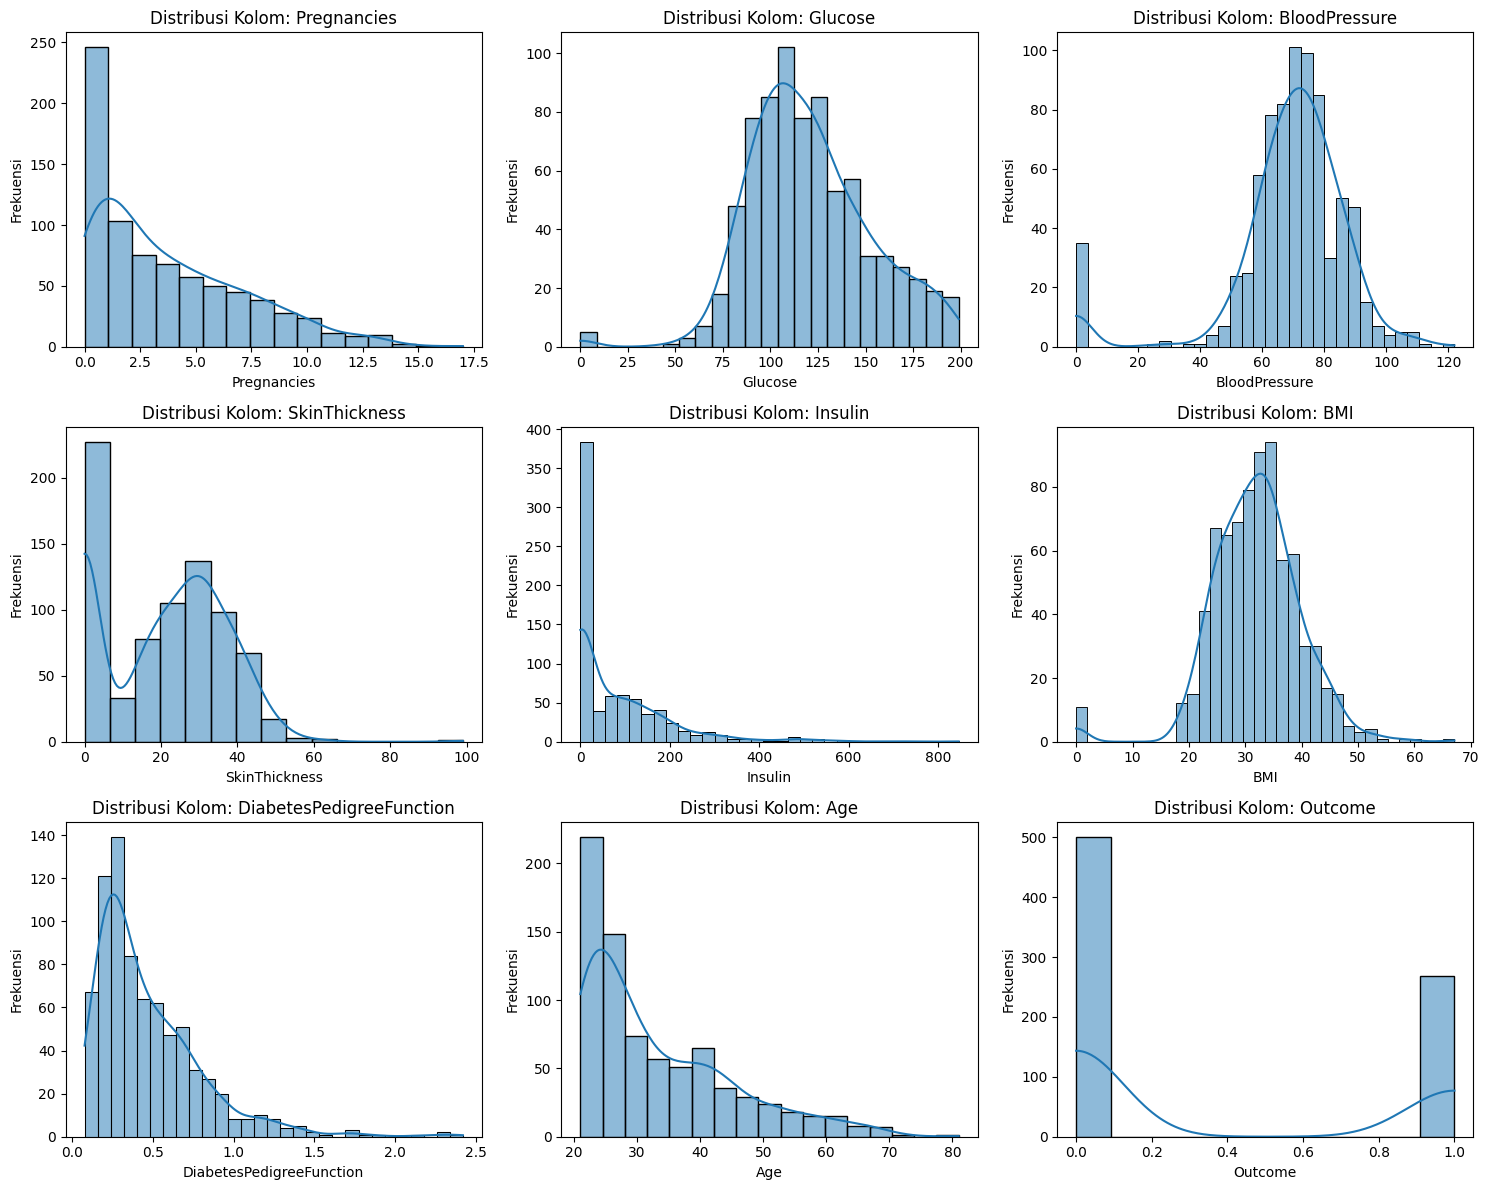

In [8]:
def plot_column_distribution(df):
  num_cols = len(df.columns)
  # Determine the number of rows and columns for the subplot grid
  n_cols = 3  # You can adjust this number based on preference
  n_rows = (num_cols + n_cols - 1) // n_cols

  plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Adjust figure size as needed

  for i, column in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    if df[column].dtype in ['int64', 'float64']:
      sns.histplot(df[column], kde=True)
      plt.title(f'Distribusi Kolom: {column}')
      plt.xlabel(column)
      plt.ylabel('Frekuensi')
    else:
      sns.countplot(y=df[column])
      plt.title(f'Distribusi Kolom: {column}')
      plt.xlabel('Jumlah')
      plt.ylabel(column)

  plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
  plt.show()

# Visualisasikan setiap kolom dalam DataFrame
plot_column_distribution(df)

dari plot distribusi di atas bisa disimpulkan:

- Pregnancies: Distribusi miring ke kanan, dengan puncak di sekitar 1-2 kehamilan dan beberapa outlier dengan jumlah yang lebih tinggi.

- Glucose: Distribusi agak normal, tetapi ada puncak pada nilai yang lebih rendah dan ekor yang memanjang ke nilai yang lebih tinggi.

- BloodPressure: Distribusi tampak kira-kira normal, berpusat di sekitar 70-80. Ada beberapa kasus nilai 0, yang mungkin menunjukkan data yang hilang atau kesalahan.

- SkinThickness: Distribusi miring ke kanan, dengan sejumlah besar nilai 0, menunjukkan data yang hilang atau karakteristik dataset di mana banyak individu tidak memiliki ketebalan kulit yang terukur di lokasi yang diuji.

- Insulin: Distribusi sangat miring ke kanan dengan sejumlah besar nilai 0, mirip dengan SkinThickness. Ini juga kemungkinan menunjukkan data yang hilang atau sejumlah besar individu dengan pengukuran insulin yang sangat rendah atau tidak ada.

- BMI: Distribusi agak berbentuk lonceng tetapi sedikit miring ke kanan. Ada beberapa kasus nilai 0, yang secara biologis tidak mungkin untuk BMI dan kemungkinan mewakili data yang hilang.

- DiabetesPedigreeFunction: Distribusi sangat miring ke kanan, dengan sebagian besar nilai terkonsentrasi pada ujung bawah.
Age: Distribusi miring ke kanan, dengan sejumlah besar individu yang lebih muda dan lebih sedikit individu yang lebih tua.

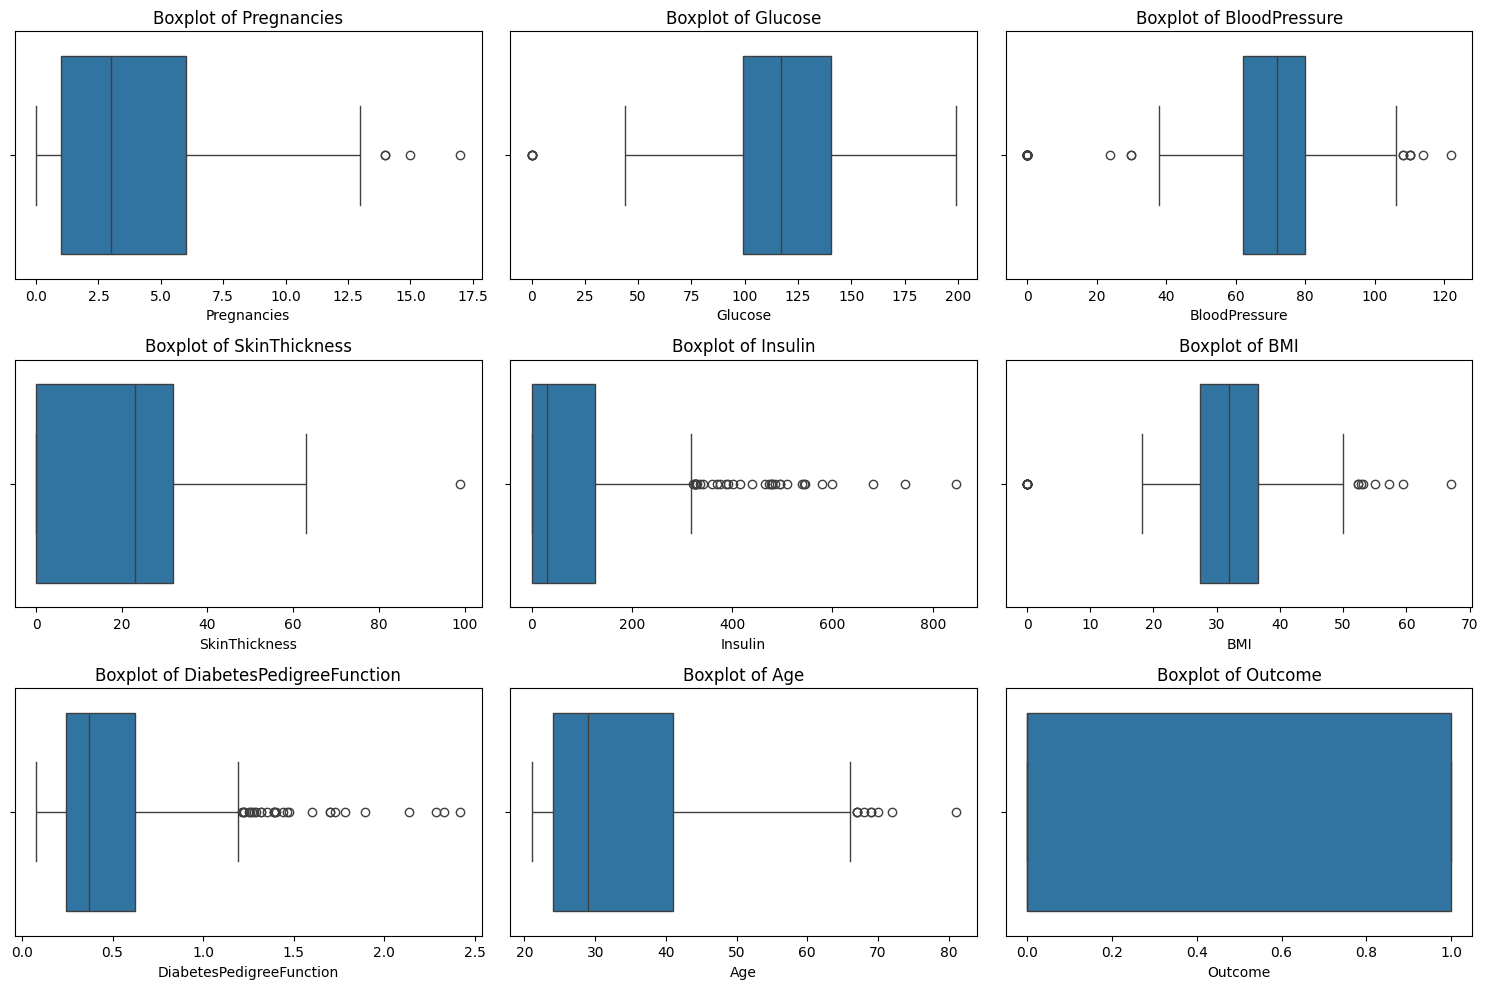

In [12]:
numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

dari output grafik diatas bisa dilihat beberapa kolom memiliki outlier, contoh nya pada kolom pregnancies

In [ ]:
# prompt: buat matrix korelasi

# Membuat matrix korelasi
correlation_matrix = df.corr()

# Menampilkan matrix korelasi dalam bentuk heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrix Korelasi Antar Fitur')
plt.show()


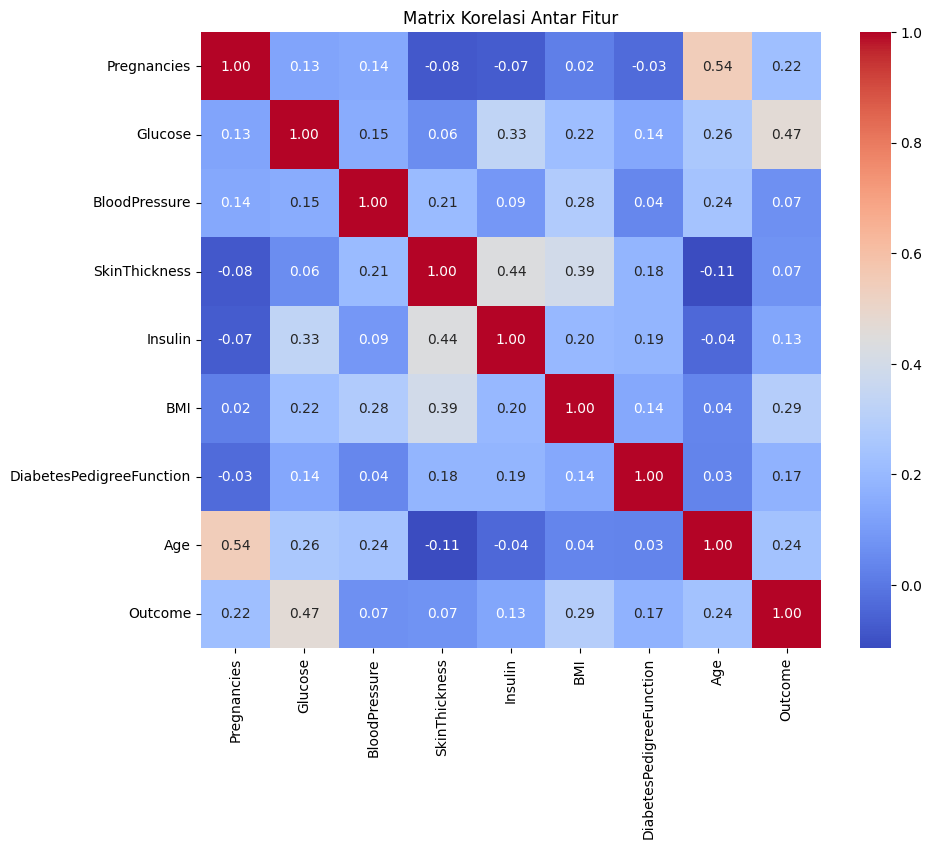

In [9]:
correlation_matrix = df.corr()

# Menampilkan matrix korelasi dalam bentuk heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrix Korelasi Antar Fitur')
plt.show()

matriks korelasi tersebut bisa dilihat bahwa fitur Glucose memiliki korelasi positif terkuat dengan Outcome (indikator diabetes), diikuti oleh BMI dan Age. Ini menunjukkan bahwa kadar glukosa darah, Indeks Massa Tubuh, dan usia adalah faktor-faktor yang paling terkait dengan kemungkinan diabetes dalam dataset ini. Fitur lain seperti BloodPressure, SkinThickness, dan Insulin menunjukkan korelasi yang lebih lemah dengan Outcome. Tidak ada korelasi negatif yang kuat antar fitur yang signifikan.

# **5. Data Preprocessing**

Pada tahap ini, akan melakukan data preprocessing yang merupakan langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.


Berikut adalah tahapan-tahapan dilakukan:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)


### Handling outlier

Jumlah data setelah hapus outlier: 636


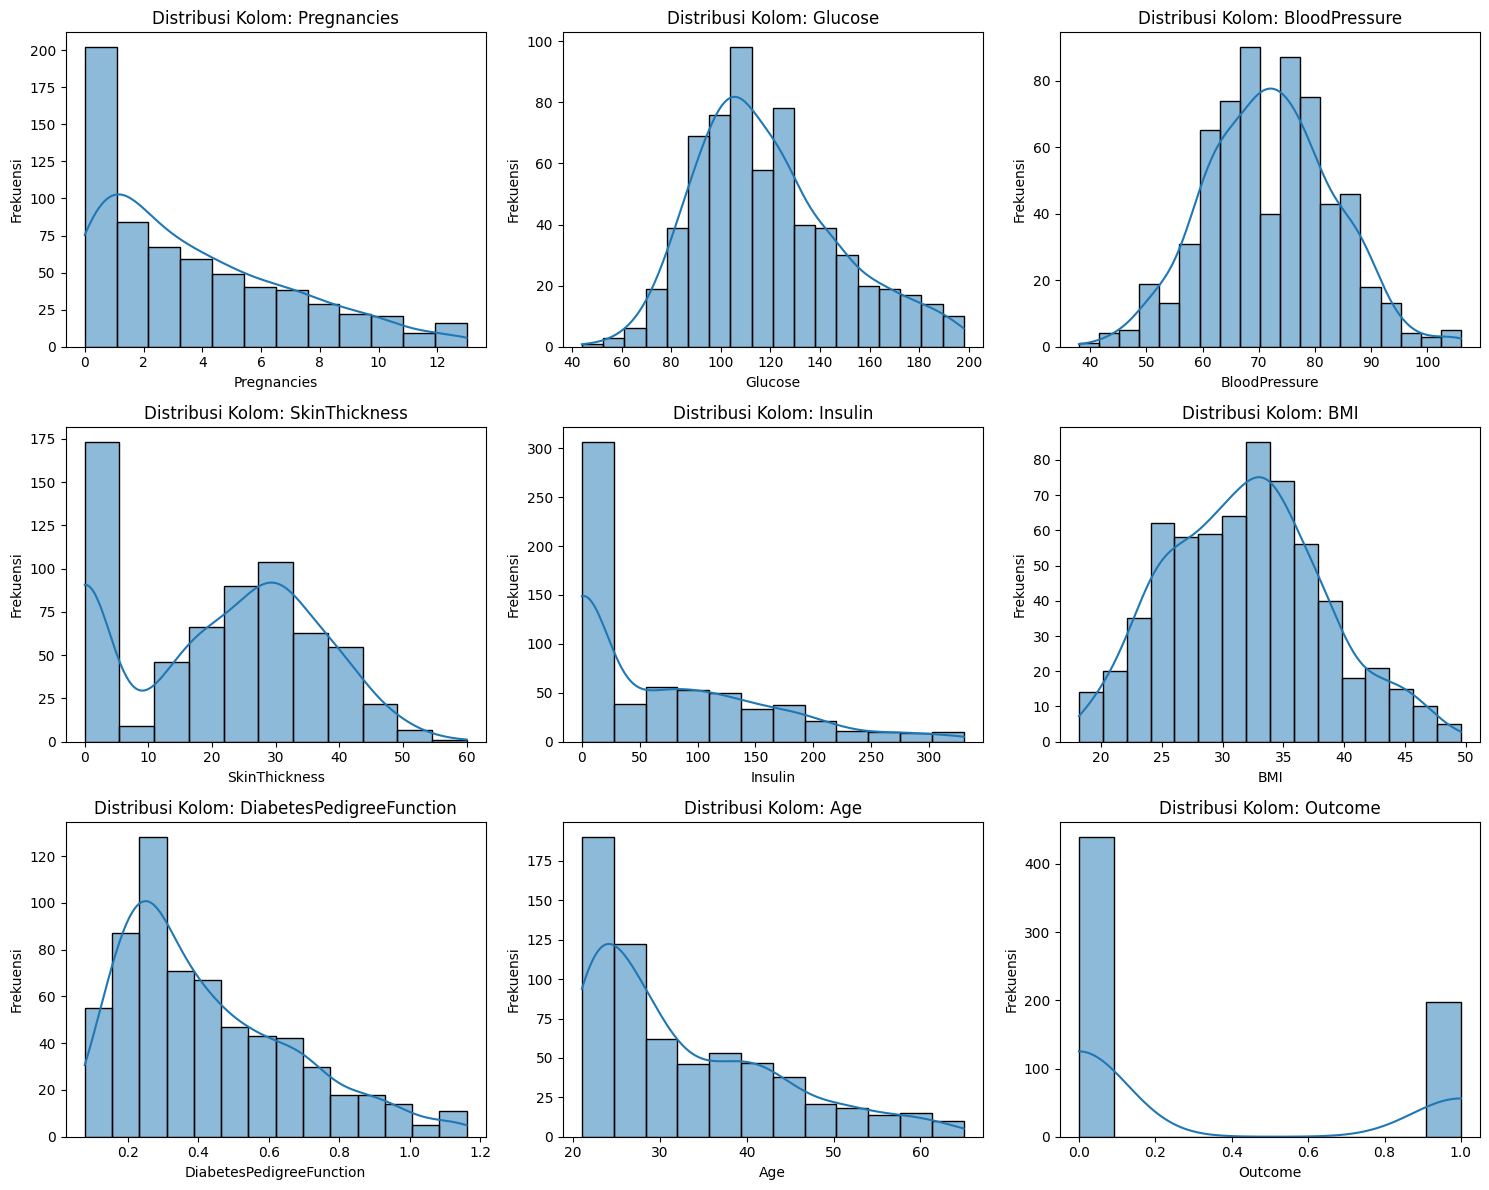

In [10]:
# Salin dataframe supaya data asli tetap aman
df_clean = df.copy()

# Loop untuk tiap fitur
for feature in df.select_dtypes(include='number'):
    Q1 = df_clean[feature].quantile(0.25)
    Q3 = df_clean[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data yang berada dalam batas normal
    df_clean = df_clean[(df_clean[feature] >= lower_bound) & (df_clean[feature] <= upper_bound)]

print(f"Jumlah data setelah hapus outlier: {df_clean.shape[0]}")
plot_column_distribution(df_clean)

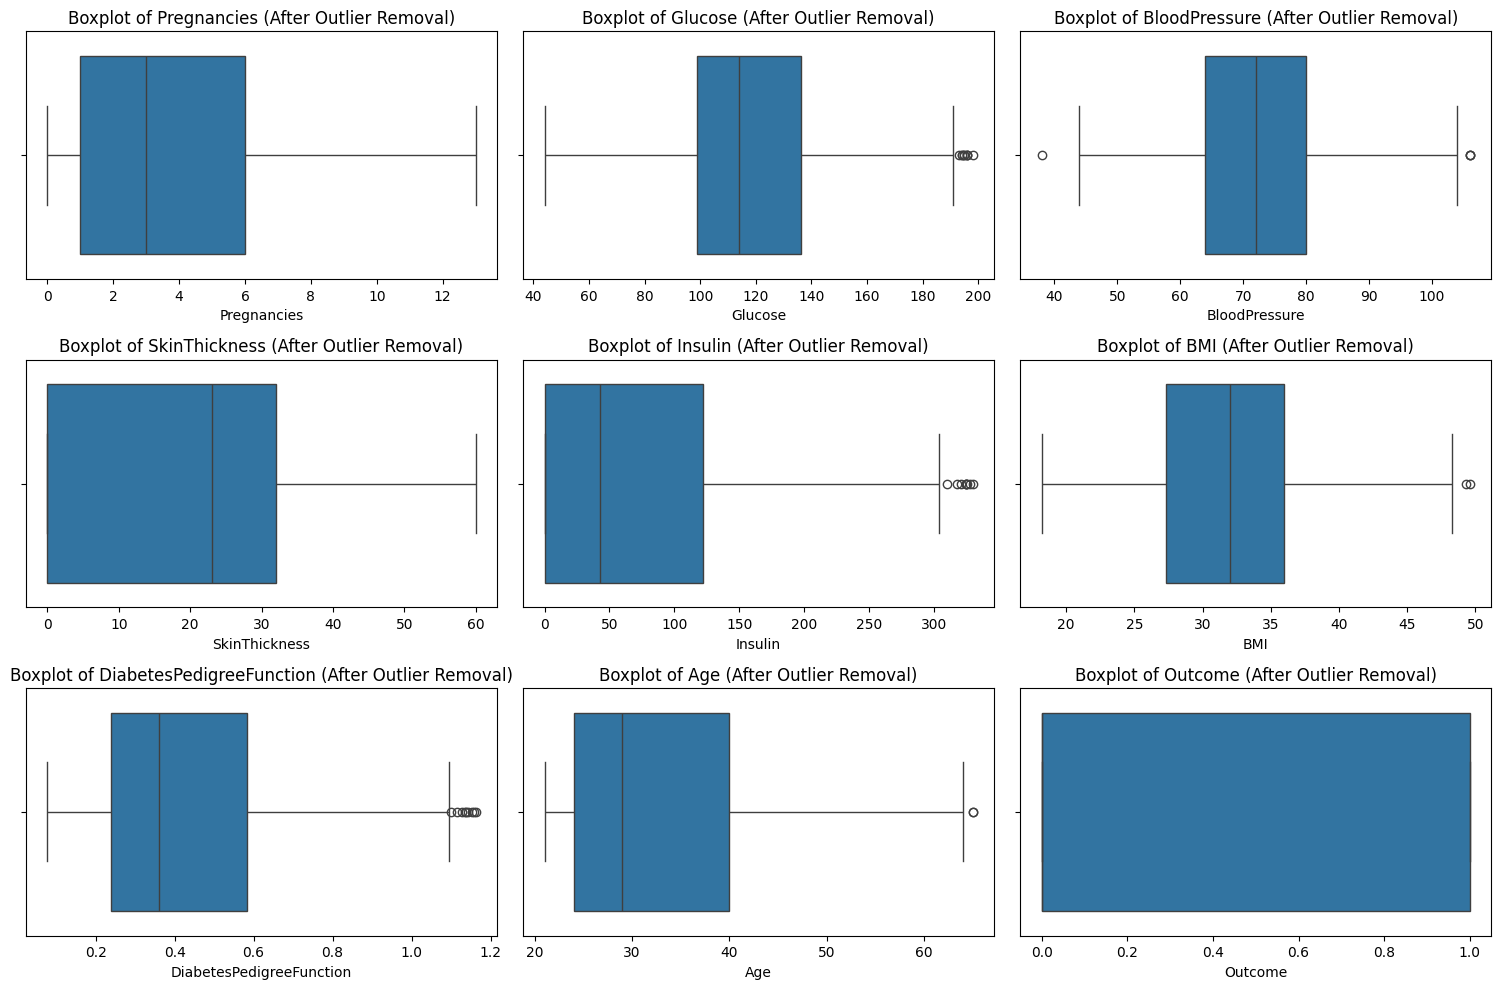

In [12]:
numeric_cols = df_clean.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
plt.tight_layout()
plt.show()

In [13]:
df_clean.to_csv('train_cleaned.csv', index=False)

### Normalisasi dan standarisasi

In [14]:
file_path = "/content/train_cleaned.csv"
df = pd.read_csv(file_path)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0


### split dataset

In [16]:
# Define features (X) and target (y)
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, shuffle=True)

In [17]:
# Reset index
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [18]:
# Tentukan kolom numerik dan kategorikal
numerical_columns = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_columns = []

In [19]:
# Scaling kolom numerik
os.makedirs("model", exist_ok=True)
for col in numerical_columns:
    scaler = StandardScaler()
    X_train[col] = scaler.fit_transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])
    joblib.dump(scaler, f"model/scaler_{col}.joblib")

In [21]:
# Gabungkan kembali fitur + label
train_df = pd.concat([X_train, pd.DataFrame(y_train, columns=["Outcome"])], axis=1)
test_df = pd.concat([X_test, pd.DataFrame(y_test, columns=["Outcome"])], axis=1)

In [27]:
# Simpan ke file CSV
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [23]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.549949,-1.241374,-0.571492,0.161417,-0.213449,0.001960,0.297977,-0.963552,0
1,1.919658,0.340415,0.313084,0.486555,0.644568,0.568858,-0.592472,0.590367,0
2,1.302256,1.096923,0.489999,0.746665,1.693256,1.641366,0.375942,0.316146,1
3,1.610957,0.099708,-1.456068,-1.334217,-0.809294,0.170497,2.829807,0.041925,1
4,0.376153,-0.450479,0.843830,0.616610,-0.809294,1.120433,-0.567852,0.498960,0


In [24]:
test_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.610957,1.131309,0.489999,0.876720,1.228496,0.308391,1.922944,0.041925,1
1,1.919658,-0.622413,0.313084,1.787105,1.335749,0.109211,-1.039749,2.784136,0
2,-0.549949,-1.172601,-0.659949,-1.334217,-0.809294,1.135755,2.074772,-0.506517,0
3,0.376153,0.959376,0.224627,-1.334217,-0.809294,-0.350435,0.039459,-0.415110,0
4,0.067452,0.753056,0.136169,-1.334217,-0.809294,-0.702831,-0.740197,0.681774,0
